## Import necessary modules

In [2]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nandini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading the file

In [3]:
# Read the SMS Spam Collection data
# The file is tab-separated with no header

messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
df = messages

## Preprocessing the text file

In [4]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['message'] = df['message'].apply(preprocess_text)

label_mapping = {'ham': 0, 'spam': 1}
df['label'] = df['label'].map(label_mapping)

In [5]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nClass distribution:")
print(df['label'].value_counts())

Dataset Shape: (5572, 2)

First few rows:
   label                                            message
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry 2 wkly comp win fa cup final tkts 2...
3      0                u dun say early hor u c already say
4      0        nah dont think goes usf lives around though

Class distribution:
label
0    4825
1     747
Name: count, dtype: int64


## Exploratory Data Analysis

In [7]:
label_counts = df['label'].value_counts()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
label
0    4825
1     747
Name: count, dtype: int64


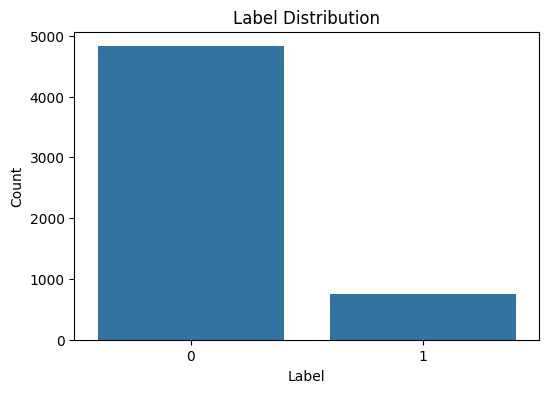

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

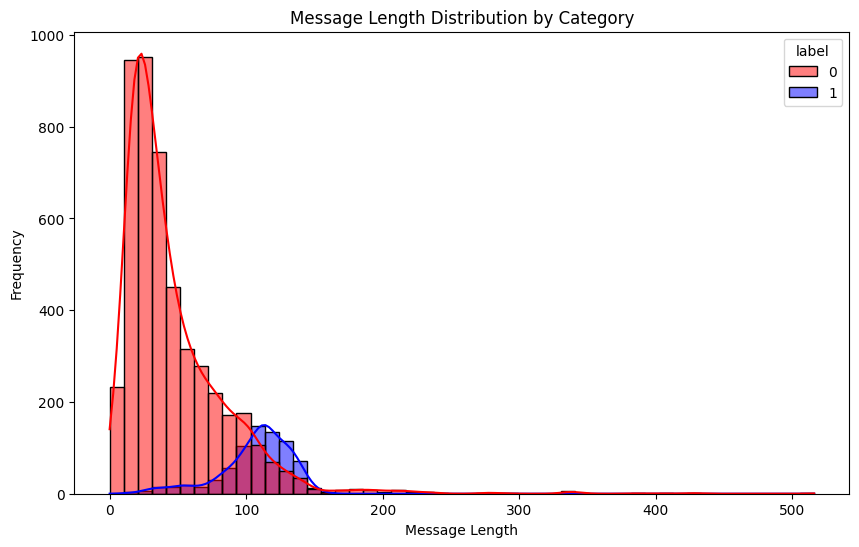

In [10]:
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', bins=50, kde=True, hue='label', palette=['red', 'blue'])
plt.title('Message Length Distribution by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

## Wordclouds

In [11]:
all_words = ' '.join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)


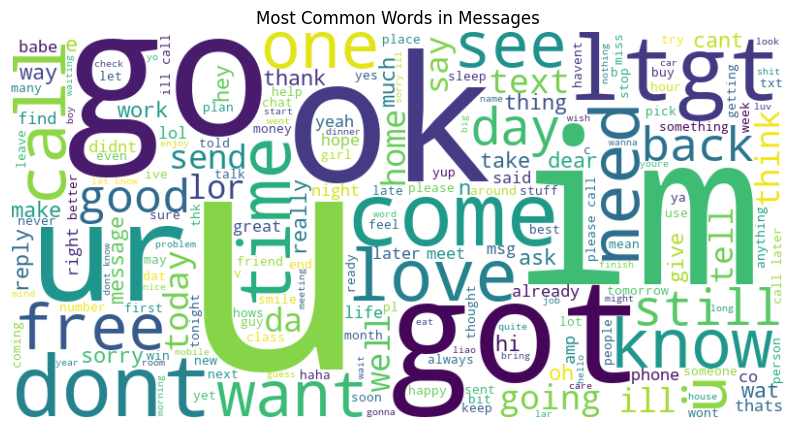

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Messages')
plt.axis('off')
plt.show()

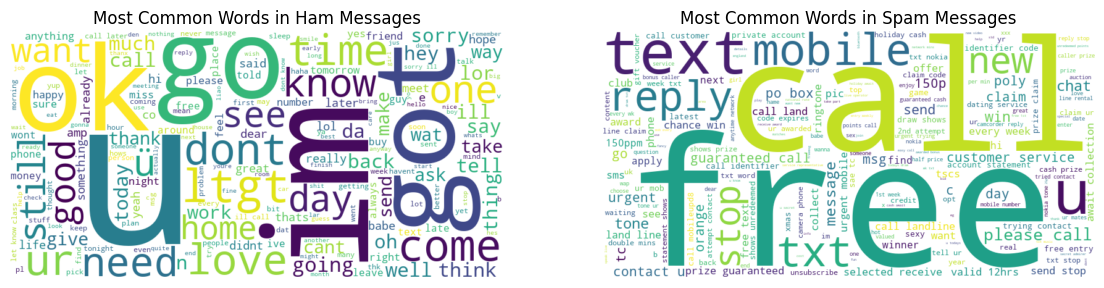

In [13]:
# Separate the messages by label
ham_messages = df[df['label'] == 0]['message']
spam_messages = df[df['label'] == 1]['message']

# Generate word clouds
ham_words = ' '.join(ham_messages)
spam_words = ' '.join(spam_messages)

ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Plot the word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Spam Messages')
plt.axis('off')

plt.show()

## Splitting the dataset

In [14]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42) 

print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (3342, 3)
Validation data shape: (1115, 3)
Test data shape: (1115, 3)


## Storing the split data for further processing

In [15]:
train_data.to_csv('train.csv', index=False)
val_data.to_csv('validation.csv', index=False)
test_data.to_csv('test.csv', index=False)